In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('lifesat.csv')

In [9]:
len(df)

27

In [5]:
df.head()

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6


In [27]:
df.rename(columns={'GDP per capita (USD)' : 'GDP'},inplace=True)

In [29]:
df.isnull().sum()

Country              0
GDP                  0
Life satisfaction    0
dtype: int64

In [31]:
df.describe()

,GDP,Life satisfaction
count,27.000000,27.000000
mean,41564.521771,6.566667
std,9631.452319,0.765607
min,26456.387938,5.400000
25%,33938.289305,5.900000
50%,41627.129269,6.800000
75%,49690.580269,7.300000
max,60235.728492,7.600000


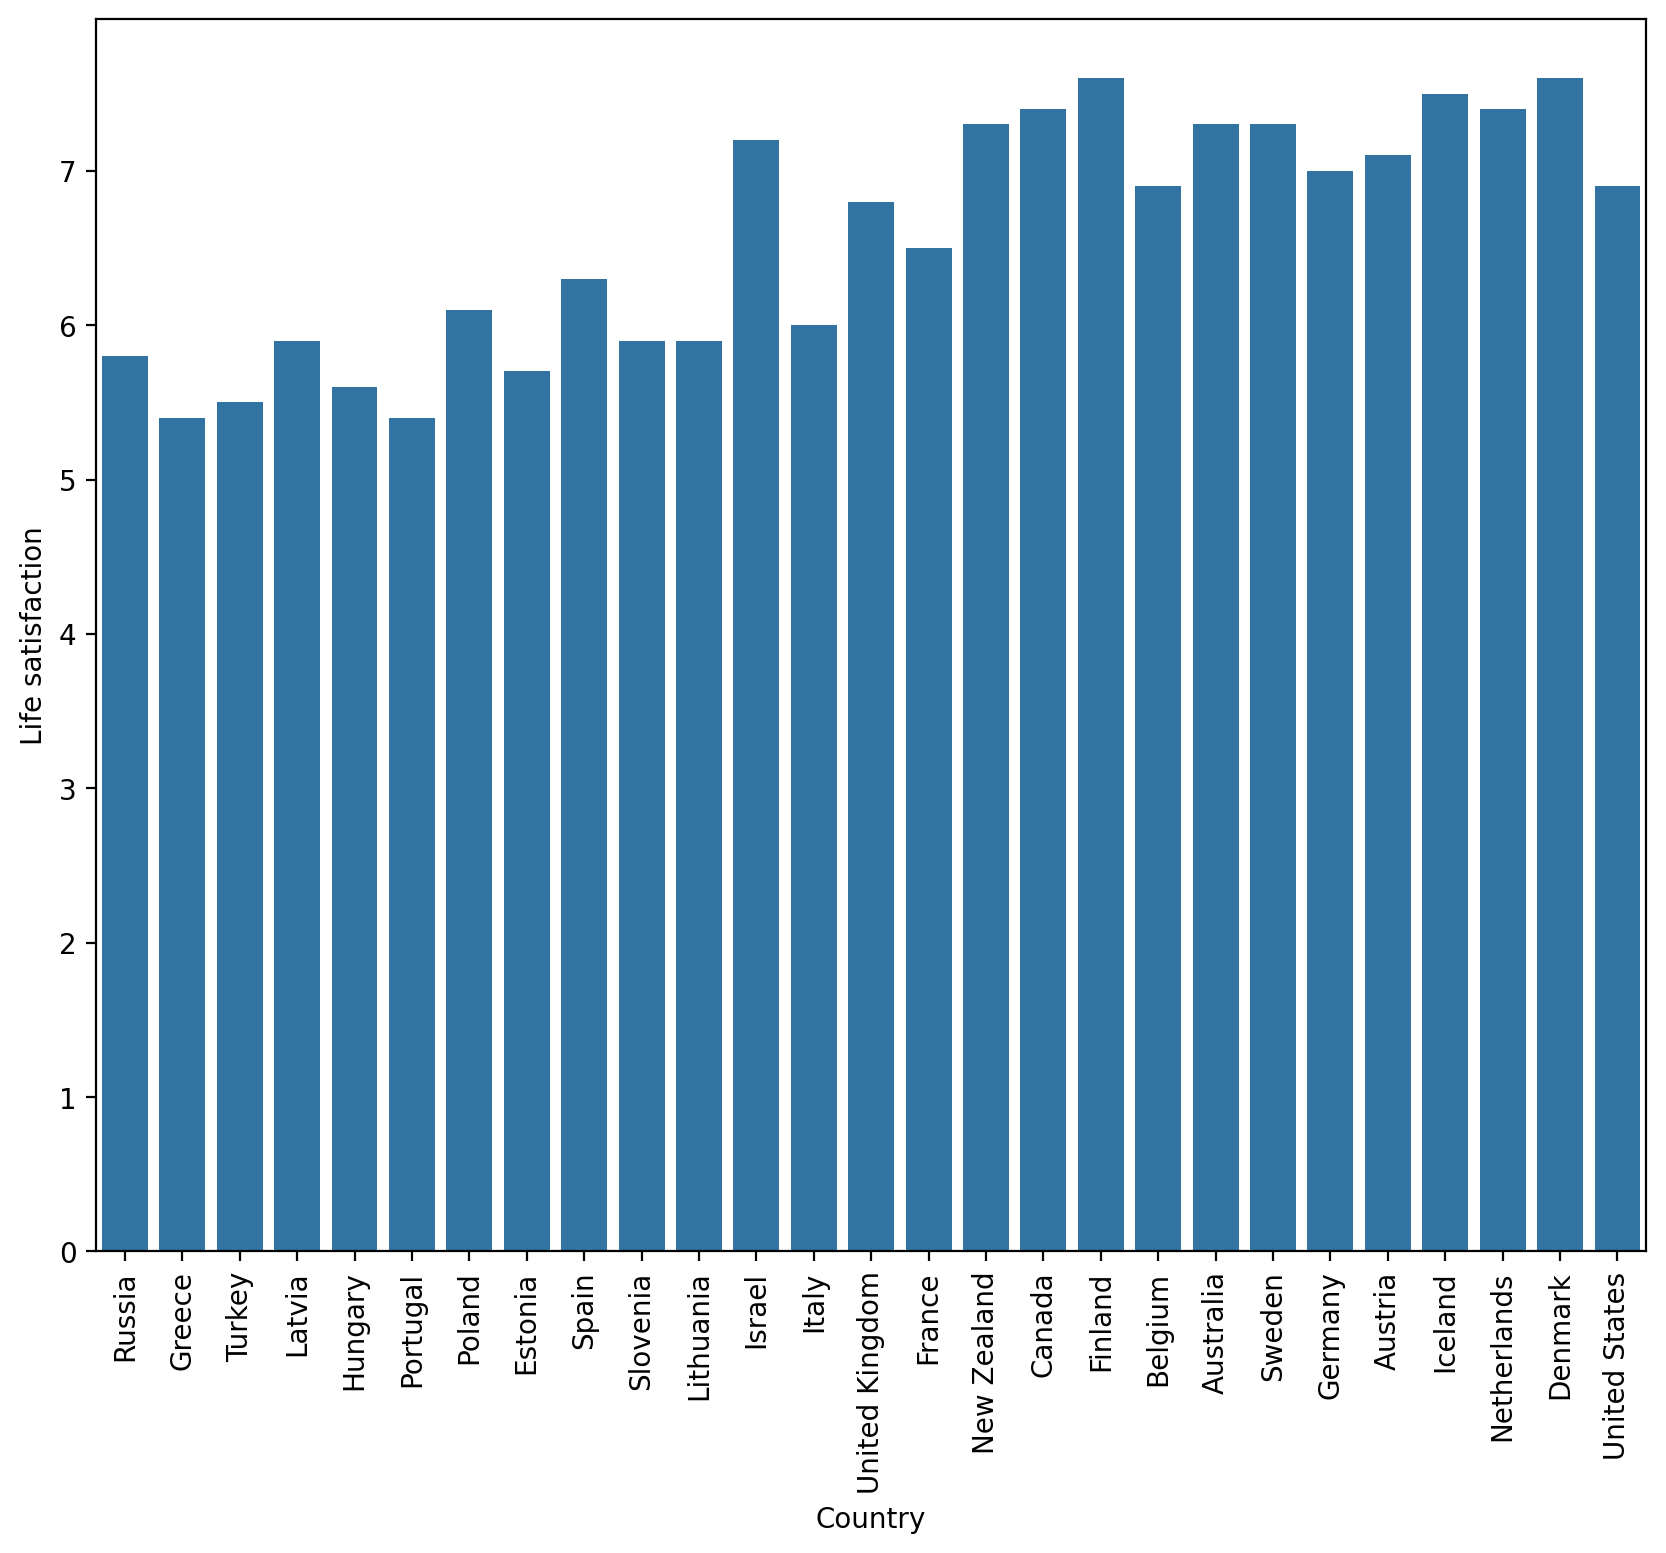

In [33]:
plt.figure(figsize=(10,8),dpi=200)
sns.barplot(df,x='Country',y='Life satisfaction')
plt.xticks(rotation = 90);

In [ ]:
#sns.heatmap(df.drop('Country',axis=1).corr(),annot=True);

<Axes: xlabel='Life satisfaction', ylabel='GDP'>

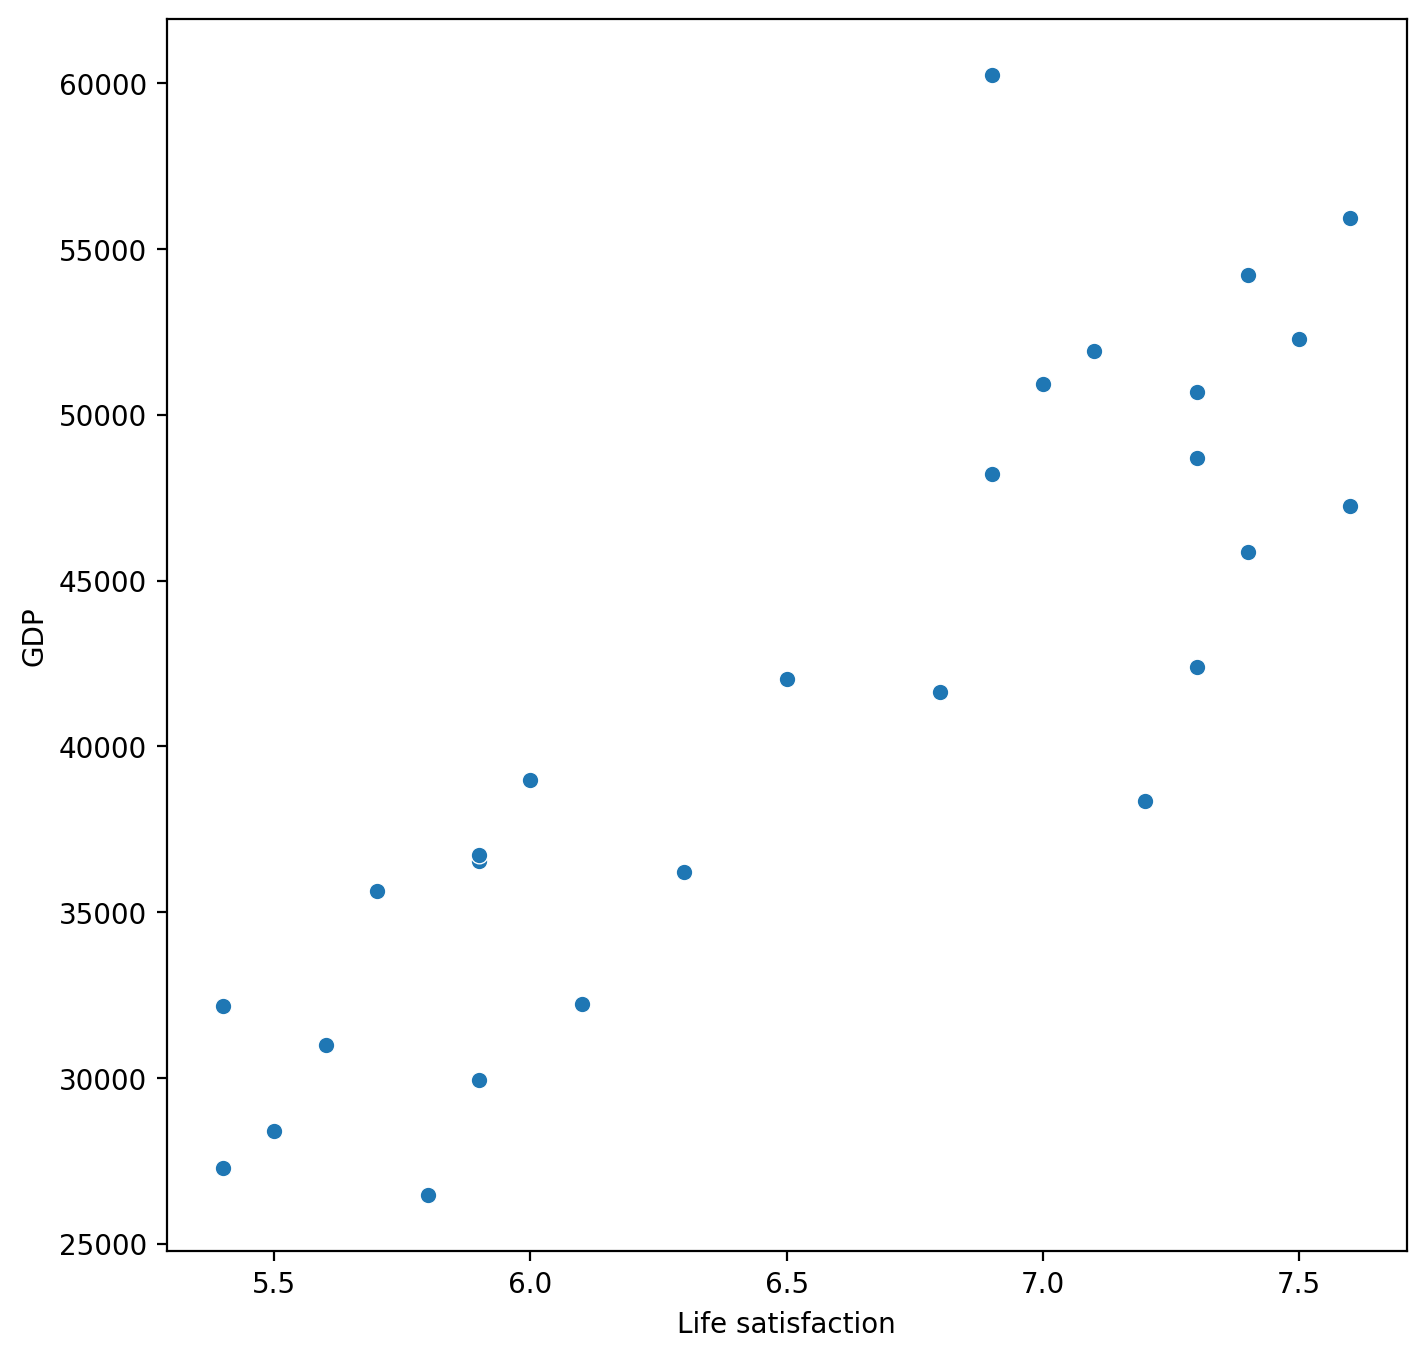

In [39]:
plt.figure(figsize=(8,8),dpi=200)
sns.scatterplot(df,x='Life satisfaction',y='GDP')

In [41]:
df[df['GDP']> 60000]

,Country,GDP,Life satisfaction
26,United States,60235.728492,6.9


In [43]:
df[df['Life satisfaction']> 7.5]

,Country,GDP,Life satisfaction
17,Finland,47260.800458,7.6
25,Denmark,55938.212809,7.6


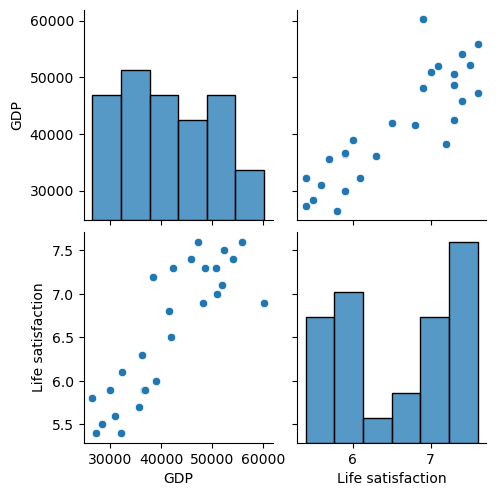

In [99]:
sns.pairplot(df,diag_kind='hist');

In [47]:
df.head(3)

,Country,GDP,Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5


In [63]:
X = df[['GDP']]
y = df['Life satisfaction']

In [65]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [69]:
from sklearn.linear_model import LinearRegression

In [71]:
model = LinearRegression()

In [73]:
model.fit(X_train,y_train)

LinearRegression()

In [75]:
y_pred = model.predict(X_test)

In [77]:
y_pred

array([6.10487836, 6.47579471, 6.12765359, 7.11288916, 5.43599296,
       6.25058468, 6.76568415, 6.86192621, 6.29519327])

In [79]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [81]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

In [83]:
MAE

0.426763883369085

In [85]:
MSE

0.2528767557684206

In [87]:
RMSE

0.5028685273194382

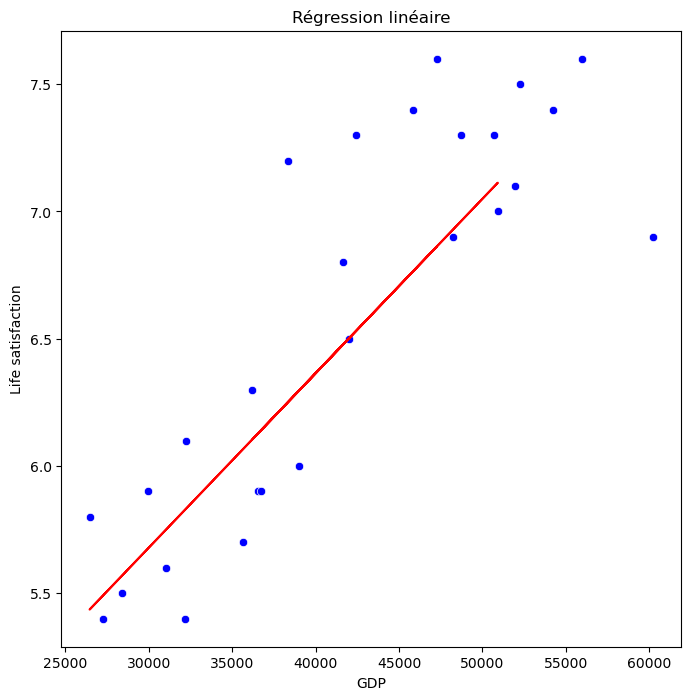

In [93]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='GDP', y='Life satisfaction', data=df, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title('Régression linéaire')
plt.show()